In [1]:
import numpy as np
import pandas as pd
from pylab import *
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

Using TensorFlow backend.
/root/.local/share/canopy/edm/envs/env3point6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/root/.local/share/canopy/edm/envs/env3point6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/root/.local/share/canopy/edm/envs/env3point6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

In [2]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [3]:
#mengambil nilai dari dataasli dan menyimpan ke Dataset untuk di eksekusi
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [4]:
#mengambil data input sebagai x data output y/ train
X = dataset[:,0:10]
Y = dataset[:,10]

In [ ]:
print(X,Y)

In [5]:
#normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [6]:
#membagi input dan data train
# X_train (10 input features, 70% of full dataset)
# X_val (10 input features, 15% of full dataset)
# X_test (10 input features, 15% of full dataset)
# Y_train (1 label, 70% of full dataset)
# Y_val (1 label, 15% of full dataset)
# Y_test (1 label, 15% of full dataset)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size = 0.3)
X_val, X_test, Y_val,Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [ ]:
xtrain

In [7]:
#membuat struktur jaringan syaraf 2 hidden layer, 10 input dan 1 output
#layer1 32 hidden cell
#layer2 32 hidden cell
#dan juga fungsi aktivasi sigmoid, dan untuk layer 1~2 activasi menggunakan Relu

model = Sequential([
    Dense(32, activation = 'relu', input_shape = (10,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

#membuat configurasi jenis training menggunakan SGD('stochastic gradien decent)
#loss fungsi menggunakan configurasi binary crossentropy
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [8]:
#melakukan train, dengan cara memasukan data train se
hist = model.fit(X_train, Y_train,
                batch_size = 32, 
                epochs = 100,
                validation_data = (X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 211us/step - loss: 0.6925 - acc: 0.5039 - val_loss: 0.6859 - val_acc: 0.5982
Epoch 2/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.6810 - acc: 0.5978 - val_loss: 0.6779 - val_acc: 0.5936
Epoch 3/100
1022/1022 [==============================] - 0s 37us/step - loss: 0.6733 - acc: 0.6067 - val_loss: 0.6714 - val_acc: 0.5753
Epoch 4/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.6666 - acc: 0.5969 - val_loss: 0.6650 - val_acc: 0.5799
Epoch 5/100
1022/1022 [==============================] - 0s 49us/step - loss: 0.6603 - acc: 0.6223 - val_loss: 0.6587 - val_acc: 0.6393
Epoch 6/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6540 - acc: 0.6840 - val_loss: 0.6525 - val_acc: 0.6804
Epoch 7/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.6478 - acc: 0.7270 - val_loss: 0.6462 - val_acc: 0.7123


In [12]:
#accuracy menunjukan berapa %evaluate function is because the function returns the loss as the first element and the accuracy as the second element.
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 28us/step


0.9132420126705953

In [20]:
#predict = model.predict(np.array([1]))
#predict_y = model.predict(X_train)
# predictions
predictions = model.predict(X_test)
#np.argmax(predictions[0])

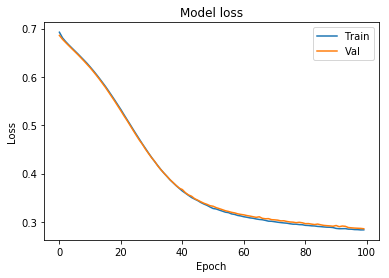

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

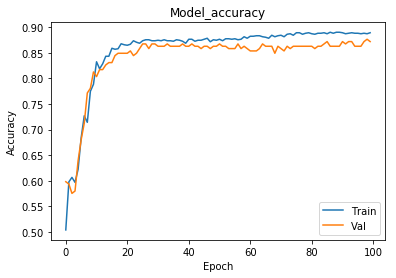

In [15]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [17]:
#over training model to try over fiting the data
model_2 = Sequential([
    Dense(1000, activation = 'relu', input_shape = (10,)),
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

#membuat configurasi jenis training menggunakan SGD('stochastic gradien decent)
#loss fungsi menggunakan configurasi binary crossentropy
model_2.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
                batch_size = 32, epochs = 100,
                validation_data = (X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4647 - acc: 0.7789 - val_loss: 0.3631 - val_acc: 0.8265
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3238 - acc: 0.8659 - val_loss: 0.4021 - val_acc: 0.8128
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3043 - acc: 0.8738 - val_loss: 0.3056 - val_acc: 0.8813
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2902 - acc: 0.8806 - val_loss: 0.2941 - val_acc: 0.8721
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2687 - acc: 0.8894 - val_loss: 0.2584 - val_acc: 0.8721
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2614 - acc: 0.8845 - val_loss: 0.2869 - val_acc: 0.8630
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2489 - acc: 0.9002 - val_loss: 0.3242 - val_acc: 0.8767
Epoch 8/

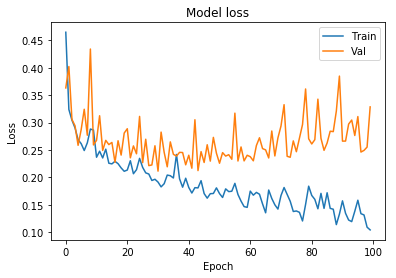

In [22]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

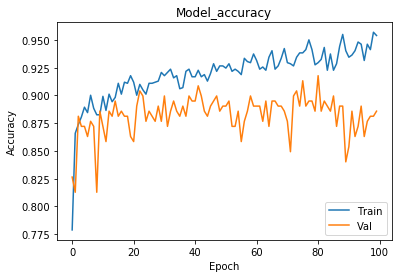

In [23]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [24]:
from keras.layers import Dropout
from keras import regularizers

In [25]:
model_3 = Sequential([
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01), input_shape = (10,)),Dropout(0.3),
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),Dropout(0.3),
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),Dropout(0.3),
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),Dropout(0.3),
    Dense(1, activation = 'sigmoid', kernel_regularizer = regularizers.l2(0.01)),
])

model_3.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

hist_3 = model_3.fit(X_train, Y_train, batch_size = 32, epochs = 100,
                    validation_data = (X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 4ms/step - loss: 14.2485 - acc: 0.6018 - val_loss: 3.9129 - val_acc: 0.6530
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 1.7034 - acc: 0.8023 - val_loss: 0.6684 - val_acc: 0.8402
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5655 - acc: 0.8581 - val_loss: 0.5106 - val_acc: 0.8721
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5085 - acc: 0.8748 - val_loss: 0.4915 - val_acc: 0.8813
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5111 - acc: 0.8679 - val_loss: 0.5015 - val_acc: 0.8767
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4852 - acc: 0.8679 - val_loss: 0.5276 - val_acc: 0.8311
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4984 - acc: 0.8532 - val_loss: 0.5496 - val_acc: 0.8311
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4351 - acc: 0.8904 - val_loss: 0.4260 - val_acc: 0.8858
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4511 - acc: 0.8767 - val_loss: 0.4425 - val_acc: 0.8721
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4383 - acc: 0.8806 - val_loss: 0.4260 - val_acc: 0.8950
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4353 - acc: 0.8894 - val_loss: 0.4679 - val_acc: 0.8584
Epoch 65/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4380 - acc: 0.8787 - val_loss: 0.4472 - val_acc: 0.8676
Epoch 66/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4410 - acc: 0.8865 - val_loss: 0.4556 - val_acc: 0.8630
Epoch 67/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4534 - acc: 0.8699 - val_loss: 0.4324 - val_acc: 0.8904
Epoch 68/100
1022/1022 [========================

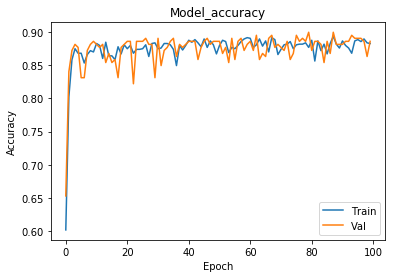

In [26]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()